In [1]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
from pyflux.results import transformer
%matplotlib inline


In [8]:
data = pd.read_excel('data.xlsx')
data.head()

,Date,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
0,2010-11-01,-0.007420,0.011481,-0.002563,-0.001652,-0.000784,0.000933,-0.004494,0.017532,0.000606,0.014445,0.010989,0.001078,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-11-02,0.013213,-0.009648,0.015991,0.009931,0.002983,0.017710,-0.018059,-0.017230,0.001213,-0.020712,-0.001359,0.024758,NaN,NaN,0.003141,0.018836,0.006623,NaN
2,2010-11-03,0.005834,0.008023,-0.003092,-0.002732,0.004853,0.008766,-0.000230,-0.021818,-0.001211,-0.003635,-0.004762,-0.002101,NaN,NaN,-0.003132,-0.019816,0.000000,NaN
3,2010-11-04,0.007335,-0.011939,0.023682,0.003835,0.008880,0.025032,0.011957,0.000531,0.003031,-0.001658,-0.004785,0.005263,NaN,NaN,-0.001047,0.007640,0.026316,NaN
4,2010-11-05,-0.007113,-0.011507,-0.011842,-0.025921,-0.001699,-0.009237,0.007271,-0.002256,0.000906,0.013289,0.013049,-0.004188,NaN,NaN,-0.015723,-0.001336,-0.006410,NaN


In [9]:
returns = transformer(data, 'vech')

Text(0.5, 1.0, 'markReturns')

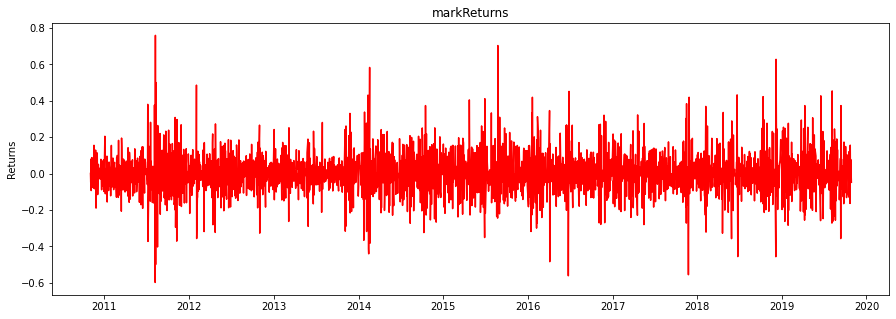

In [10]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

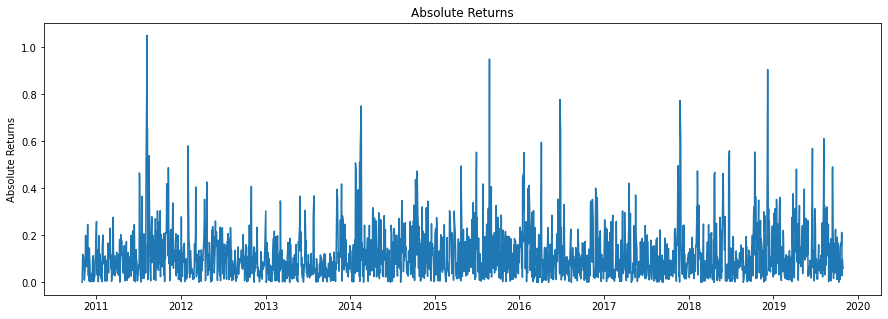

In [9]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [7]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: vech model                          Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: 1675.4346                         
End Date: 2019-10-28 00:00:00                           AIC: -3342.8692                                   
Number of observations: 2236                            BIC: -3320.0194                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0037                                                           
q(1)                                 

# turbulence periods -- 2010/11/01    2011/08/31

In [30]:
import datetime
df = pd.read_excel('data.xlsx')
first_period = df[datetime.datetime(2010, 11, 1, 0, 0, 0) <= df.Date]
first_period= first_period[first_period.Date <= datetime.datetime(2011, 8, 30, 0, 0, 0)]
first_period = first_period[['Date', 'NVS', 'PFIZER']]
first_period

,Date,NVS,PFIZER
0,2010-11-01,-0.007420,0.011481
1,2010-11-02,0.013213,-0.009648
2,2010-11-03,0.005834,0.008023
3,2010-11-04,0.007335,-0.011939
4,2010-11-05,-0.007113,-0.011507
...,...,...,...
203,2011-08-24,0.008383,0.008224
204,2011-08-25,-0.025979,-0.023382
205,2011-08-26,0.006223,0.013920
206,2011-08-29,0.010249,0.036793


In [31]:
returns = transformer(first_period)


Text(0.5, 1.0, 'markReturns')

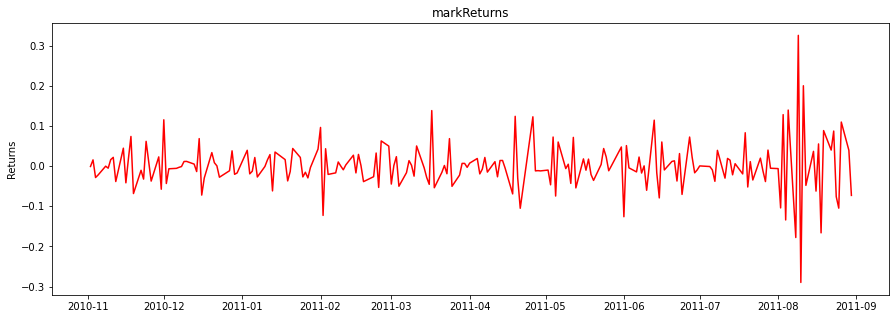

In [32]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

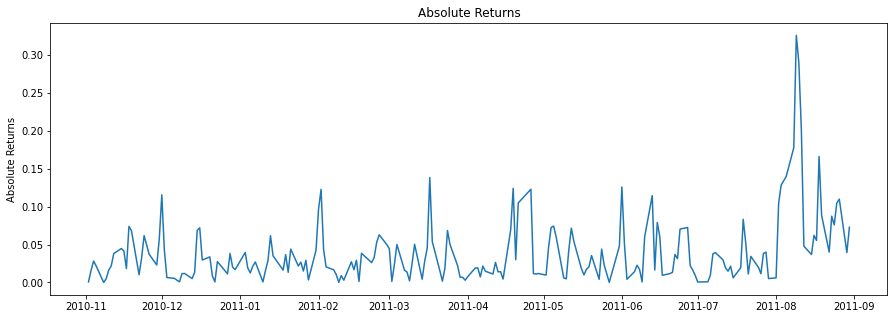

In [33]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [34]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: bekk model                          Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: 349.6793                          
End Date: 2011-08-30 00:00:00                           AIC: -691.3587                                    
Number of observations: 206                             BIC: -678.0472                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0008                                                           
q(1)                                 

# turbulence periods --- 2011/09/01 2011/12/30


In [36]:
import datetime
df = pd.read_excel('data.xlsx')
first_period = df[datetime.datetime(2010, 9, 1, 0, 0, 0) <= df.Date]
first_period= first_period[first_period.Date <= datetime.datetime(2011, 12, 30, 0, 0, 0)]
first_period = first_period[['Date', 'NVS', 'PFIZER']]
first_period

,Date,NVS,PFIZER
0,2010-11-01,-0.007420,0.011481
1,2010-11-02,0.013213,-0.009648
2,2010-11-03,0.005834,0.008023
3,2010-11-04,0.007335,-0.011939
4,2010-11-05,-0.007113,-0.011507
...,...,...,...
287,2011-12-23,0.007255,0.009246
288,2011-12-27,0.002811,-0.002749
289,2011-12-28,-0.005431,-0.011024
290,2011-12-29,0.001233,0.008360


In [37]:
returns = transformer(first_period)

Text(0.5, 1.0, 'markReturns')

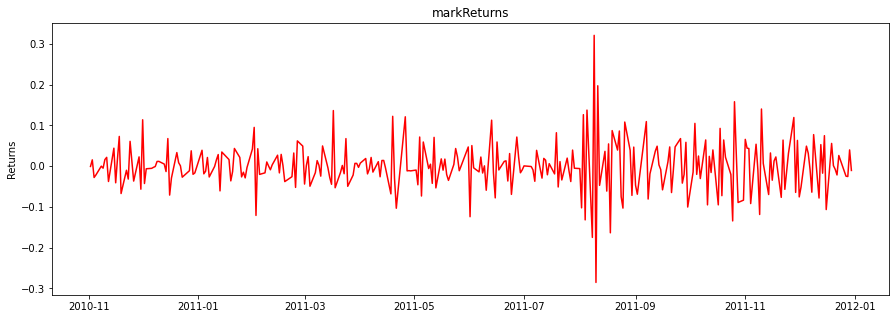

In [38]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

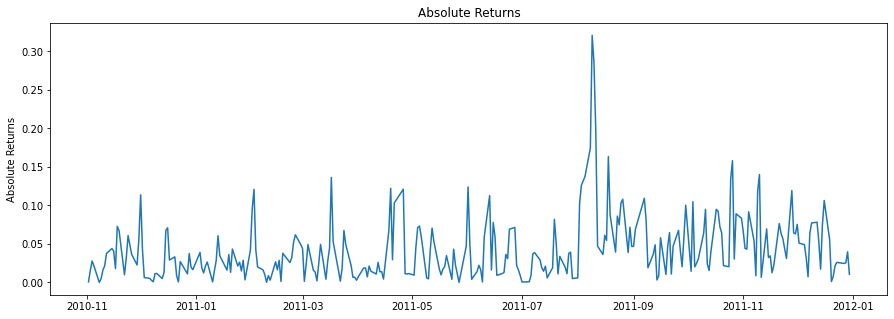

In [39]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [40]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: bekk model                          Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: 456.9849                          
End Date: 2011-12-30 00:00:00                           AIC: -905.9698                                    
Number of observations: 290                             BIC: -891.2903                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0009                                                           
q(1)                                 